### Evaluation Project - 9

# Insurance Claims- Fraud Detection

### Problem Statement:
**Business case:**                                                                       
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.                                                      
                                                                                          
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.                                       
                                                           
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [109]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [110]:
# loading dataset and checking shape
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
print("rows:",df.shape[0],"          columns:",df.shape[1])
pd.set_option("display.max_columns",None)
df.head(10)

rows: 1000           columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,02-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,13-01-2015,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,Associate,tech-support,base-jumping,unmarried,0,0,27-02-2015,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,3525 3rd Hwy,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,FEMALE,PhD,other-service,golf,own-child,0,0,30-01-2015,Single Vehicle Collision,Front Collision,Total Loss,Police,WV,Arlington,4872 Rock Ridge,21,1,NO,1,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,PhD,priv-house-serv,camping,wife,0,-39300,05-01-2015,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,3066 Francis Ave,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [111]:
# checking duplicate rows
print("Nunmber of duplicate rows:",df.duplicated().sum())

Nunmber of duplicate rows: 0


In [112]:
# checking ' ','NA','-','?'
df.isin([' ','NA','-','?']).sum().any()

True

- i can see in dataset head there '?' in some columns 

In [113]:
# lets confirm 
print("is there other character in any row",df.isin([' ','NA','-']).sum().any())
print("is there '?' in any row: ",df.isin(['?']).sum().any())

is there other character in any row False
is there '?' in any row:  True


columns have only "?" character

In [114]:
# removing "?"
df = df.replace('?',np.nan)

In [115]:
print("is there '?' in any row: ",df.isin(['?']).sum().any())

is there '?' in any row:  False


In [116]:
# let's check null values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

**Null values are in 4 columns** 
- collision_type
- property_damage
- police_report_available
- _c39 : all the values in this column are null. so, i'll drop this column

In [117]:
# droping _c39
df = df.drop(['_c39'],axis=1)

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

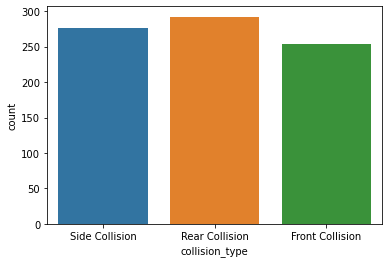

In [118]:
# checking data in collision_type
sns.countplot(df.collision_type)
df.collision_type.value_counts()

- number of all 3 types of collision are nearly same
- and i'll use mode to fill null values

In [119]:
# filling  null values in collision_type
df.collision_type = df.collision_type.fillna(df.collision_type.mode()[0])

NO     338
YES    302
Name: property_damage, dtype: int64

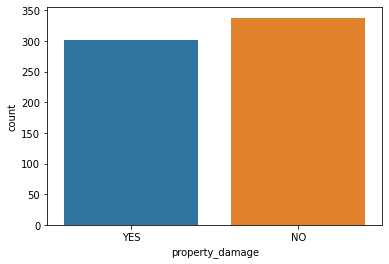

In [120]:
# checking data in property_damage
sns.countplot(df.property_damage)
df.property_damage.value_counts()

In [121]:
# i'll use mode to fill null values in property_damage and police_report_available as they are categorical columns
df.property_damage = df.property_damage.fillna(df.property_damage.mode()[0])
df.police_report_available = df.police_report_available.fillna(df.police_report_available.mode()[0])

In [122]:
# checking null values
df.isna().sum().sum()

0

- null values are removed

In [123]:
# checking number of unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- Policy number and incident location are unique features and will not have any impact on the machine learning hence i will drop that column

In [124]:
# dropping Policy number and incident location
df = df.drop(['incident_location','policy_number'],axis=1)

In [125]:
# checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

- dataset has float, object, int values

In [126]:
# checking stats of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00


- there may be outliers in total claim amount, injury_claim,property_claim and vehicle_claim as max value is higher as compared to qunatile range
- some columns are categorical here so i'll explore them in visualization part

In [127]:
# checking stats of ibject data
df.describe(include=['O']).T

,count,unique,top,freq
policy_bind_date,1000,951,01-01-2006,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,02-02-2015,28
incident_type,1000,4,Multi-vehicle Collision,419


**Converting object data into numerical using label encoding**

### Label Encoding

In [128]:
# label encoding
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lab.fit_transform(df[i])

- data is converted into numerical form

In [129]:
# separating continous and categorical column
cat = []
con = []
for i in df.columns:
    if len(df[i].unique())<=15:
        cat.append(i)
    else:
        con.append(i)
        

<AxesSubplot:>

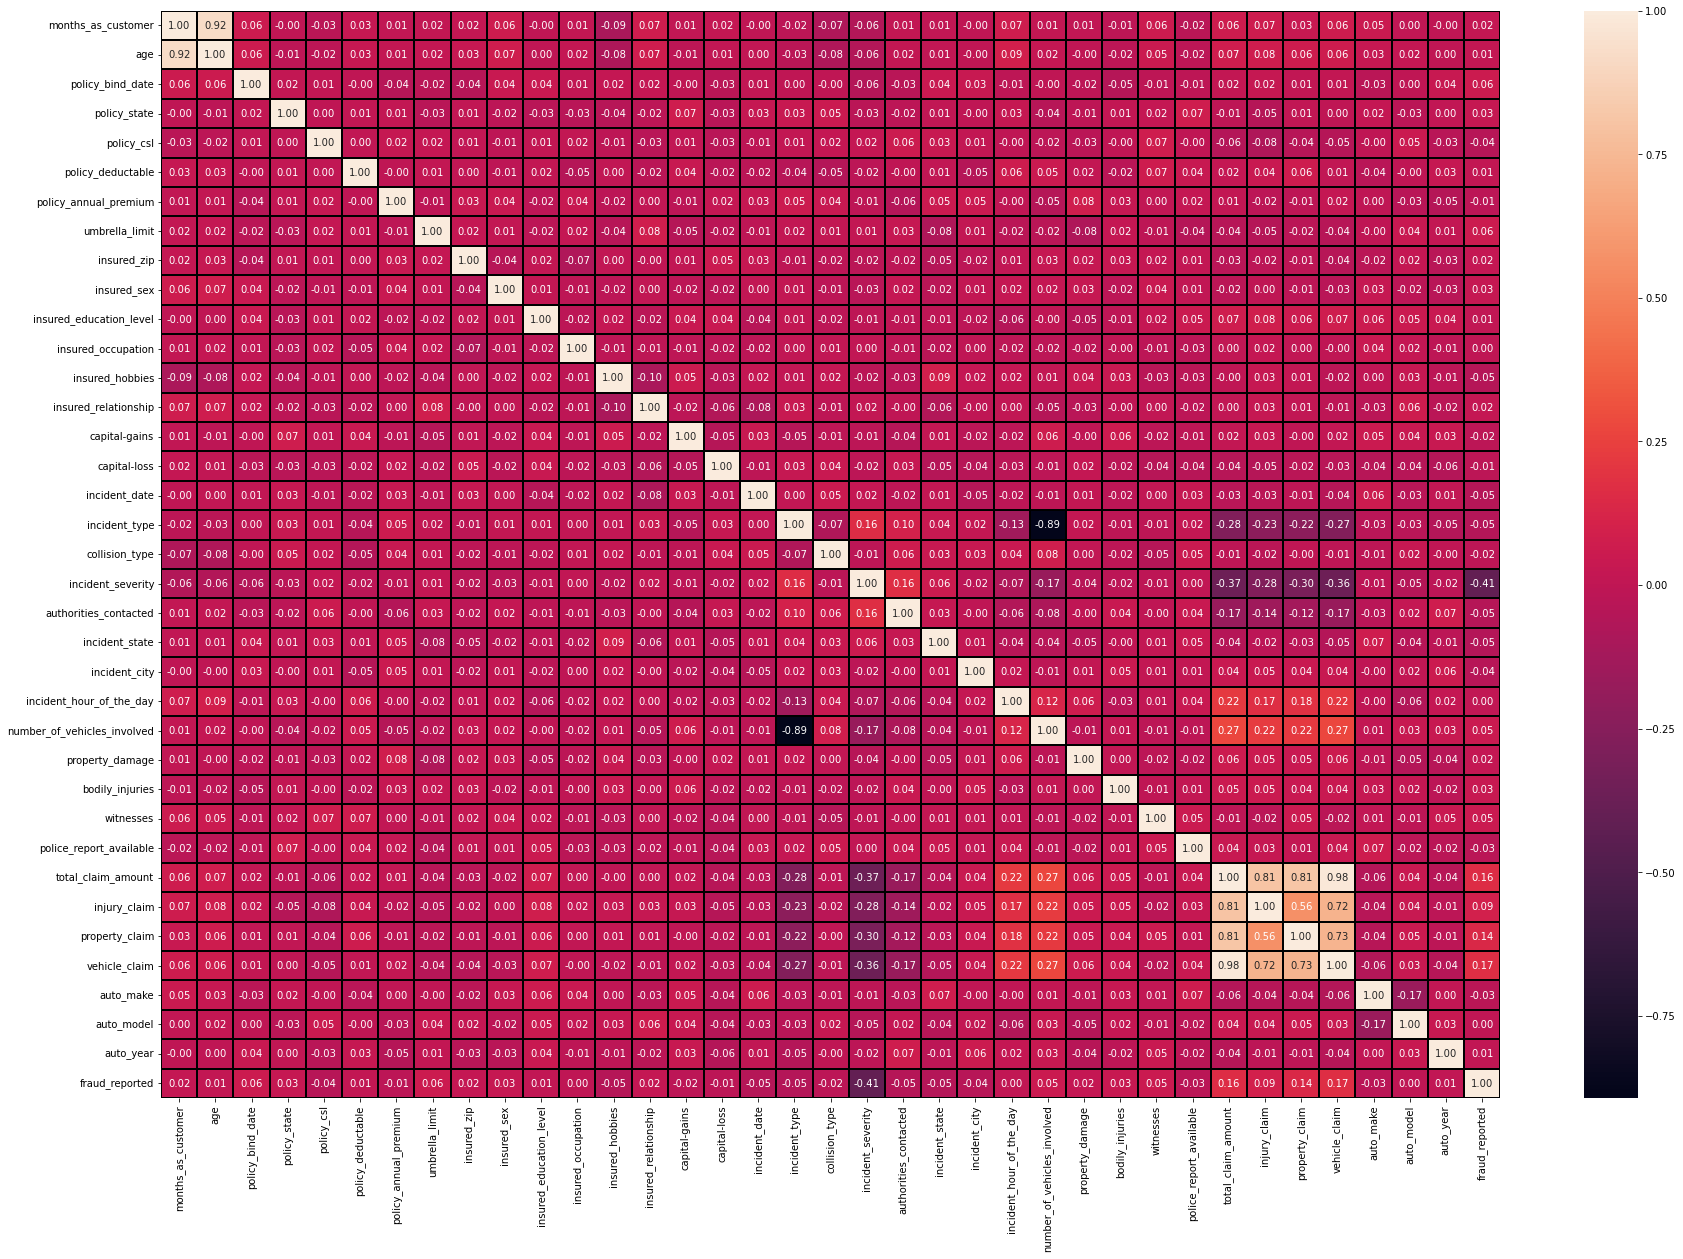

In [130]:
# checking correlation
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=0.1,fmt='0.2f')

- Total_claim_amount, injury_claim, property_claim and Vehicle_claim are highly corelated with each other

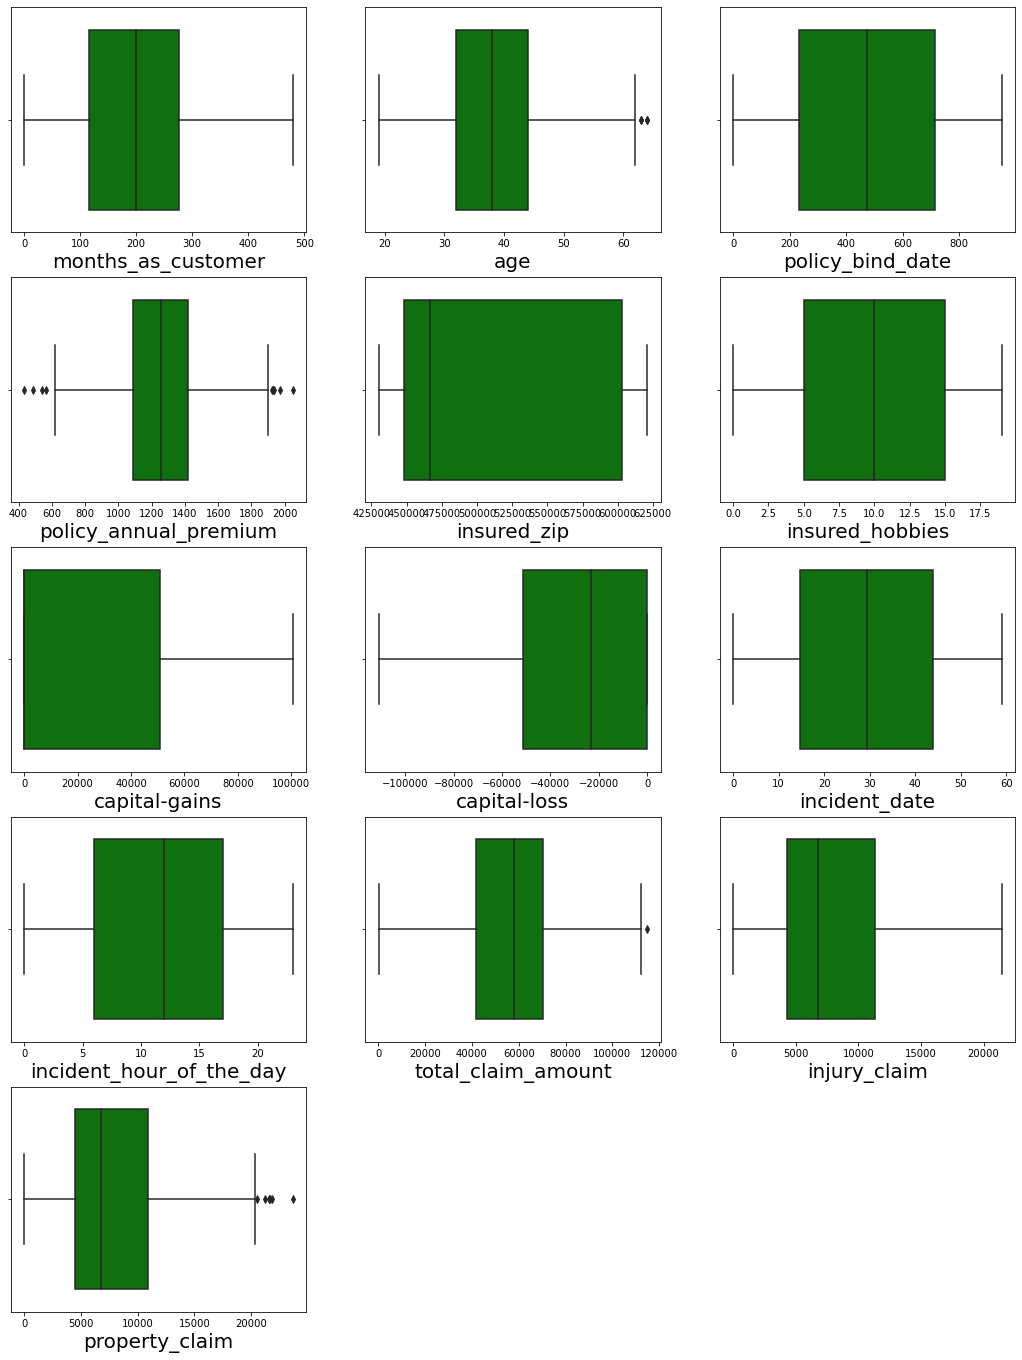

In [131]:
# checking outliers in continuos columns
plt.figure(figsize=(18,24))
plot = 1
for column in df[con]:
    if plot<=13:
        ax = plt.subplot(5,3,plot)
        sns.boxplot(x=column,data=df[con],color='green')
        plt.xlabel(column,fontsize=20)
    plot+=1
plt.show()
    

In [143]:
# removing outliers from age
min_a, max_a = df.age.quantile([0.0, 0.997])
min_a, max_a

(19.0, 63.0)

<AxesSubplot:xlabel='age'>

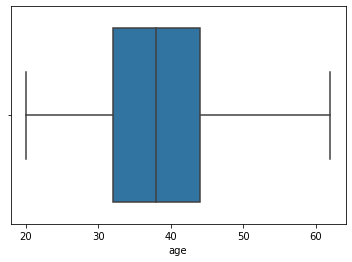

In [144]:
# removing rows containing ouotliers
df = df[(df.age<max_a)&(df.age>min_a)]
sns.boxplot(x=df['age'])

In [183]:
# removing outlier from policy_annual_premium
min_a, max_a = df.policy_annual_premium.quantile([0.005, .9955])
min_a, max_a

(624.8409, 1910.575110000004)

<AxesSubplot:xlabel='policy_annual_premium'>

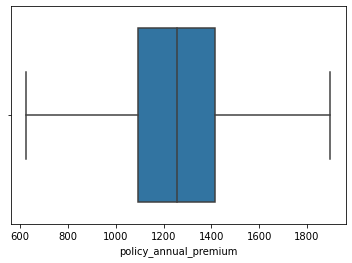

In [186]:
# removing rows containing ouotliers
df = df[(df.policy_annual_premium<max_a)&(df.policy_annual_premium>min_a)]
sns.boxplot(x=df['policy_annual_premium'])

In [188]:
# removing outlier from property_claim
min_a, max_a = df.property_claim.quantile([0.000, .99])
min_a, max_a

(0.0, 19498.799999999996)

<AxesSubplot:xlabel='property_claim'>

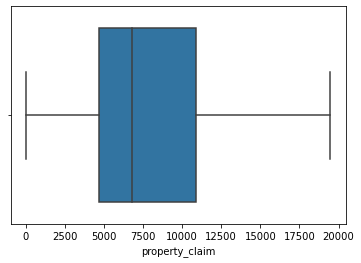

In [189]:
df = df[(df.property_claim<max_a)&(df.property_claim>min_a)]
sns.boxplot(x=df['property_claim'])

In [191]:
df.shape[0]

956

- Outliers are removed

**Checking skewness**

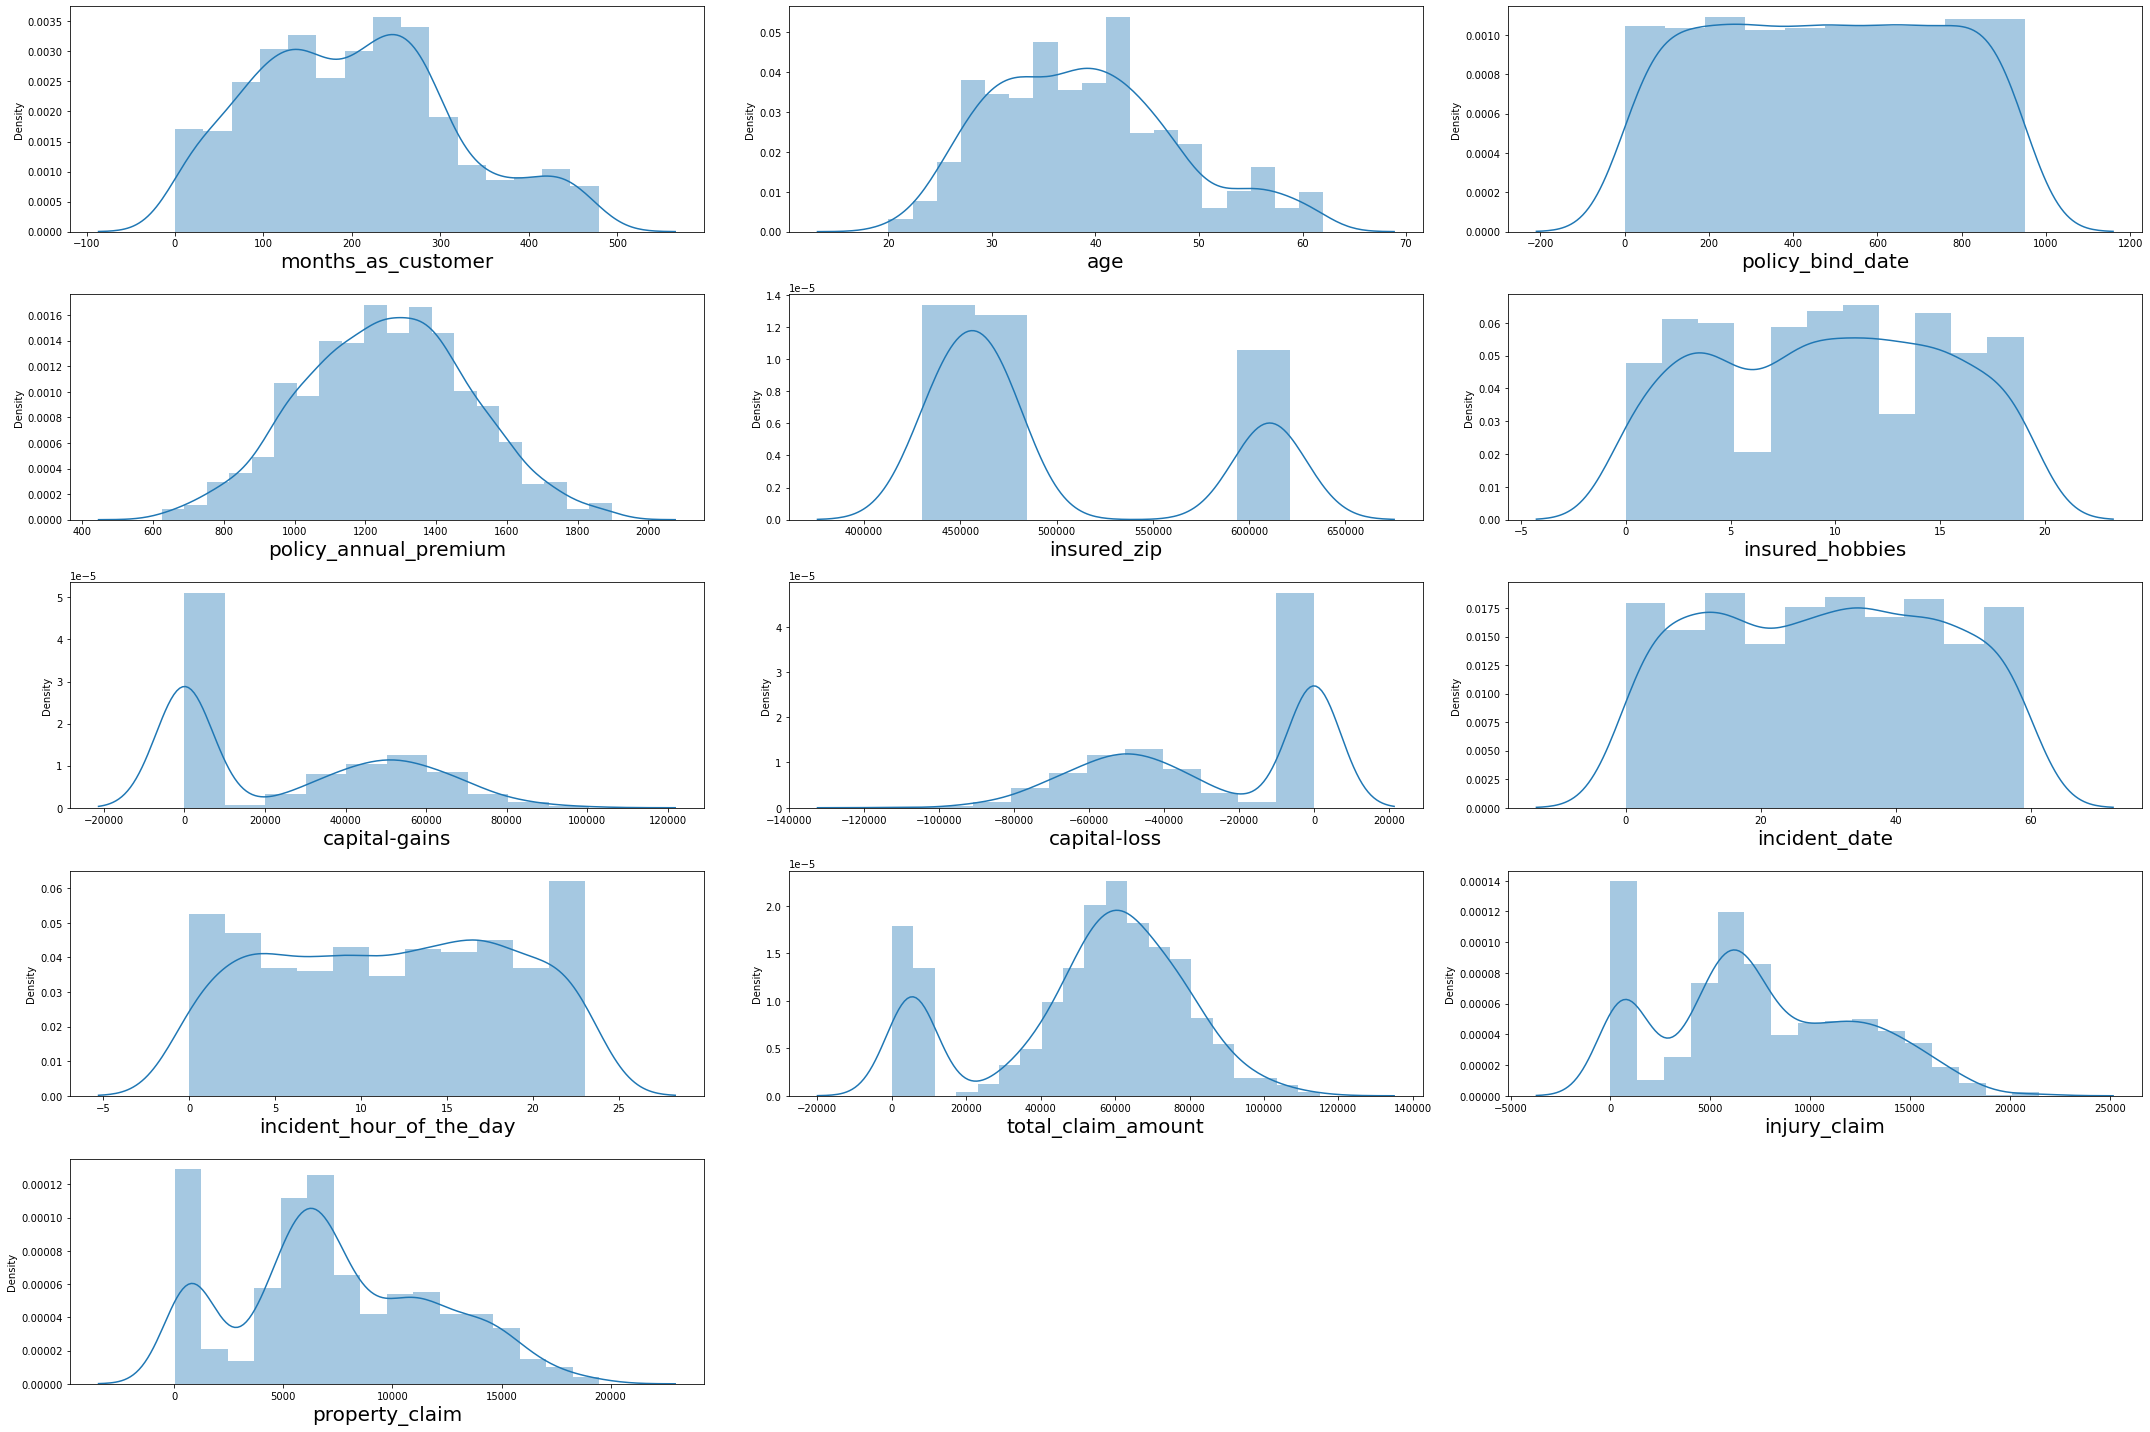

In [192]:
# let's check the distribution of data
plt.figure(figsize = (30,20))
plotnumber = 1

for column in df[con]:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.tight_layout()

- there is some skewness in some features let's remove it

In [193]:
# removing skewness using 'yeo-johnson'
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[con] = scaler.fit_transform(df[con].values)

- skewness is removed

**Data balancing**

In [195]:
# split feature and label
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']
y=pd.DataFrame(data=y)

x.shape,y.shape

((956, 36), (956, 1))

In [196]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()

X,Y=SM.fit_resample(x,y)

y_new=pd.DataFrame(data=Y)
x_new=pd.DataFrame(data=X)

x_new.shape,y_new.shape

((1452, 36), (1452, 1))

<AxesSubplot:ylabel='fraud_reported'>

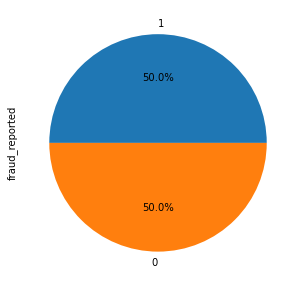

In [197]:
y_new['fraud_reported'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In [199]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_new)
sc_x=pd.DataFrame(sc_x,columns=x_new.columns)


### PCA

In [200]:
from sklearn.decomposition import PCA
testPCA=PCA()
Y=testPCA.fit(sc_x)

#Checking the cumulative sum of the expalined variance ratio.

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 11.10185709,  16.6160307 ,  21.38049248,  26.08665507,
        29.97310667,  33.59891842,  37.09708214,  40.44038425,
        43.69517295,  46.93122154,  50.00042325,  52.96640003,
        55.86627949,  58.67285042,  61.43814182,  64.16271054,
        66.7419908 ,  69.27684   ,  71.79093142,  74.26995638,
        76.74016389,  79.16814413,  81.46009264,  83.74105169,
        85.98633537,  88.14154642,  90.1533383 ,  92.13358494,
        94.09089185,  96.03324514,  97.81133358,  98.80171339,
        99.33998897,  99.71653224,  99.99417203, 100.        ])

In [ ]:
FinalPCA=PCA(n_components=32)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

In [203]:
x=finalx


In [204]:
y=y_new
x.shape,y.shape

((1452, 32), (1452, 1))

## Building Models

In [205]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score

In [207]:
#check the best possible random state to train our model
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.852233676975945  on Random state 962


### Split data into tarin and test

In [208]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=962)

##### Models

In [209]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
adc=AdaBoostClassifier(n_estimators=100)

model=[lg,sv,knn,rfc,dtc,gnb,adc]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.852233676975945
[[126  27]
 [ 16 122]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       153
           1       0.82      0.88      0.85       138

    accuracy                           0.85       291
   macro avg       0.85      0.85      0.85       291
weighted avg       0.85      0.85      0.85       291

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8694158075601375
[[136  17]
 [ 21 117]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       153
           1       0.87      0.85      0.86       138

    accuracy                           0.87       291
   macro avg       0.87      0.87      0.87       291
weighted avg       0.87      0.87      0.87       291

-------------------------------------------------------------------------------------------


## Cross Validation of Models

In [210]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')


Mean Accuracy of LogisticRegression()
0.7810878066121578
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.8355492356914326
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.7087166725915394
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8341746652446972
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7143050124422325
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.8086906031520321
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.7859438322076076
-------------------------------------------------------------------------------


### ROC_AUC score

In [211]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

ROC_AUC score of LogisticRegression()
0.8537936913895992


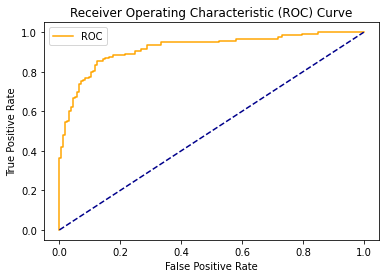

-------------------------------------------------------------------------------
ROC_AUC score of SVC(probability=True)
0.8683574879227053


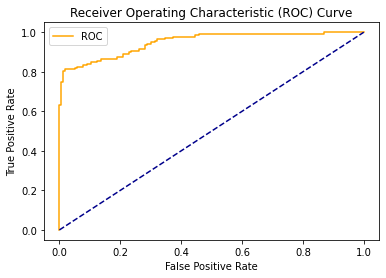

-------------------------------------------------------------------------------
ROC_AUC score of KNeighborsClassifier()
0.7041062801932367


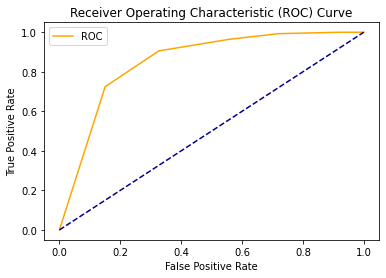

-------------------------------------------------------------------------------
ROC_AUC score of RandomForestClassifier()
0.8712702472293266


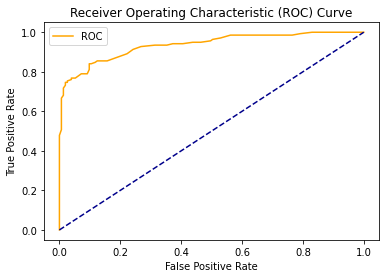

-------------------------------------------------------------------------------
ROC_AUC score of DecisionTreeClassifier()
0.768897414038079


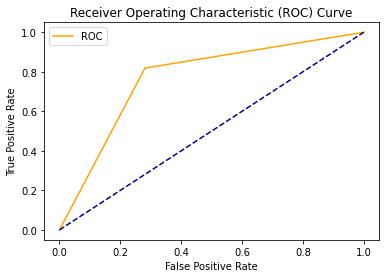

-------------------------------------------------------------------------------
ROC_AUC score of GaussianNB()
0.8371696504688834


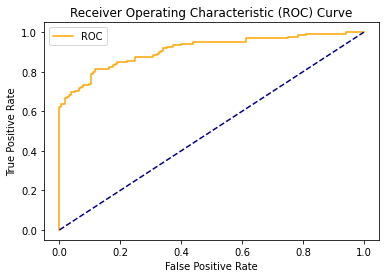

-------------------------------------------------------------------------------
ROC_AUC score of AdaBoostClassifier(n_estimators=100)
0.8265842568911623


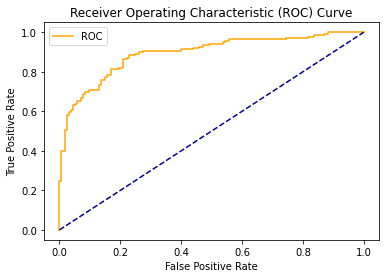

-------------------------------------------------------------------------------


In [212]:
auc = []
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    score = roc_auc_score(y_test,pred)
    auc.append(score)
    print('ROC_AUC score of', m)
    print(score)
    probs = m.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    print('-------------------------------------------------------------------------------')

In [213]:
 Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.852234,0.781088,0.853794
1,SVC,0.869416,0.835549,0.868357
2,KNeighborsClassifier,0.690722,0.708717,0.704106
3,RandomForestClassifier,0.865979,0.834175,0.871270
4,DecisionTreeClassifier,0.783505,0.714305,0.768897
5,GaussianNB,0.838488,0.808691,0.837170
6,AdaBoostClassifier,0.824742,0.785944,0.826584


We can conclude that RFC and SVC has performed well with less overfitting and underfitting.

Lets Hypertune the RandomForest model to check if we can improve the accuracy.

### Hyper Parameter Tuning

In [214]:
from sklearn.model_selection import GridSearchCV

rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [215]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50,100],
             'criterion':['gini', 'entropy']}

In [216]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

### Final Model

Random Forest classifier Performance after HyperTuning
-----------------------------------------------
Accuracy Score 87.62886597938144
Cross Validation Score 83.002725441403
AUC ROC Score 87.48934356351236


AUC ROC Curve with Final Mod


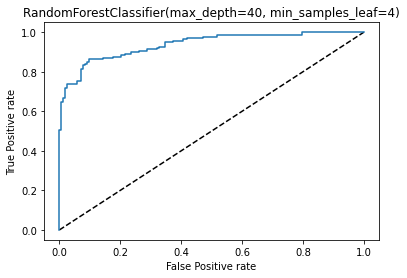

In [232]:
Finalmod=RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 4, min_samples_split=2,n_estimators=100,max_depth=40,criterion='gini')
Finalmod.fit(x_train,y_train)
pred1=Finalmod.predict(x_test)
acc1=accuracy_score(y_test,pred1)

cvs1=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score1=roc_auc_score(y_test,Finalmod.predict(x_test))

print('Random Forest classifier Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc1*100)
print('Cross Validation Score',cvs1.mean()*100)
print('AUC ROC Score',auc_score1*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

If we observe the above metrics, We got good values with hyperparameter tuning model compare to model without hyper parameter tuning with Random Forest Classifier, Increased accuracy from 87% to 88% with the CV score of 83.00% and AUC ROS score of 87.48%

**saving the model**

In [233]:
import joblib
joblib.dump(Finalmod,'RandomForestClassifier.obj')

['RandomForestClassifier.obj']

The above dataframe have original data with the predicted data from the best model.

- Concluding Remarks:-                                                          
This project has built a model that can detect auto insurance fraud. In doing so, the model can reduces loses for insurance companies. The challenge behind fraud detection in machine learning is that frauds are far less common as compared to legit insurance claims.